Modelo Gassmann

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
km=73e9
kfl1=0.13e9
kfl2=2.2e9
rhom=2.71e3
rhofl1=3e2
rhofl2=1e3
Vp1=3e3
Vs1=1.65e3
Phi=0.15

In [3]:
#calculos
M=Vp1**2*(rhom*(1-Phi)+Phi*rhofl1)
mu1=Vs1**2*((1-Phi)*rhom+Phi*rhofl1)
k1=M-(4/3)*mu1

kdry=(k1*(1-Phi)+k1*km/kfl1*Phi-km)/(k1/km+km/kfl1*Phi-1-Phi)
k2=kdry+((1-(kdry/km))**2)/(Phi/kfl2+(1-Phi)/km-kdry/(km**2))
M2=k2+(4/3)*mu1
Vp2=(M2/((1-Phi)*rhom+Phi*rhofl2))**0.5
Vs2=(mu1/((1-Phi)*rhom+Phi*rhofl2))**0.5

In [4]:
### Matriz
km=73e9
kfl1=0.13e9
kfl2=2.2e9
rhom=2.71e3
rhofl1=3e2
rhofl2=1e3
Vp1=np.array([2965,2941,2840,2760,2671,2654,2631,2599,2576,2591,2611,2639,2657,2656,2718,2932,2894,2863,2812,2896,3006,2957,2918,2882,2844,2848,2842,2842,2839,2815,2786,2809,2845,2872,2873,2876,2909,2921,2927,3004,2992])
Vs1=np.array([1623,1851,1856,1820,1737,1689,1661,1614,1586,1623,1573,1597,1565,1584,1632,1855,1838,1855,1900,1881,1813,1726,1728,1758,1782,1761,1734,1694,1702,1722,1734,1727,1710,1726,1716,1670,1684,1649,1656,1635,1613])
Phi=np.array([0.144,0.154,0.183,0.251,0.261,0.258,0.252,0.263,0.272,0.287,0.279,0.265,0.260,0.265,0.266,0.253,0.243,0.242,0.241,0.226,0.216,0.227,0.239,0.242,0.234,0.199,0.213,0.238,0.255,0.248,0.256,0.262,0.255,0.249,0.225,0.218,0.221,0.246,0.245,0.233,0.222])
Vp2=np.zeros([41])
Vs2=np.zeros([41])
Z=np.zeros([41])
a=0

Text(0.5, 1.0, 'Substitución de Fluido (Gassmann)')

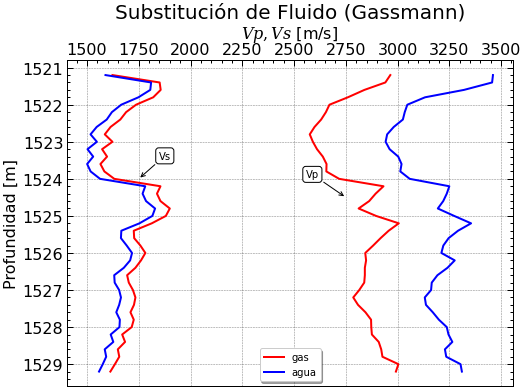

In [5]:
for b in range(15212,15294,2):
    Z[a]=b/10
    M=Vp1[a]**2*(rhom*(1-Phi[a])+Phi[a]*rhofl1)
    mu1=Vs1[a]**2*((1-Phi[a])*rhom+Phi[a]*rhofl1)
    k1=M-(4/3)*mu1

    kdry=(k1*(1-Phi[a])+k1*km/kfl1*Phi[a]-km)/(k1/km+km/kfl1*Phi[a]-1-Phi[a])
    k2=kdry+((1-(kdry/km))**2)/(Phi[a]/kfl2+(1-Phi[a])/km-kdry/(km**2))
    M2=k2+(4/3)*mu1
    Vp2[a]=(M2/((1-Phi[a])*rhom+Phi[a]*rhofl2))**0.5
    Vs2[a]=(mu1/((1-Phi[a])*rhom+Phi[a]*rhofl2))**0.5
    a+=1

fig, ax = plt.subplots()
ax.plot(Vp1,Z,'-r',label='gas')
ax.plot(Vs1,Z,'-r')
ax.plot(Vp2,Z,'-b',label='agua')
ax.plot(Vs2,Z,'-b')
ax.annotate("Vs", xy=(1750,1524), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
ax.annotate("Vp", xy=(2750,1524.5), xytext=(-40,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xlabel('X LABEL')    
ax.xaxis.set_label_position('top')

legend = ax.legend(loc='best', shadow=True, fontsize='medium')

plt.xlabel('$\it{Vp, Vs}$ [m/s]')
plt.ylabel("Profundidad [m]")
plt.title('Substitución de Fluido (Gassmann)', fontsize=20)